# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file)

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table.
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

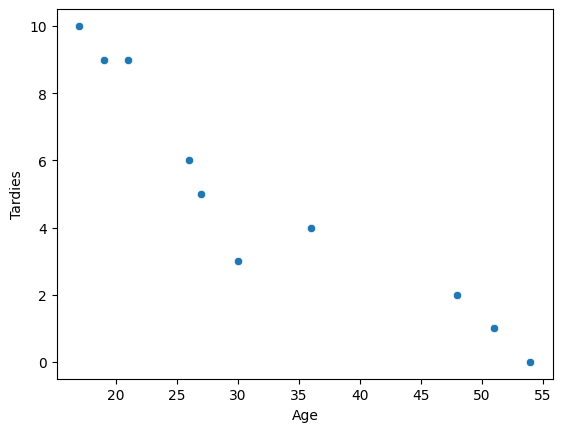

In [3]:
# Your code here

sns.scatterplot(student_data, x="Age", y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, it seems like there is a trend between age and tardies. The older the students, the less late they are.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Covariance
covariance = student_data[["Age", "Tardies"]].cov()

# Correlation
correlation = student_data[["Age", "Tardies"]].corr()

print(covariance)
print(correlation)

# Both measurements measure correlation between two variables.
# However, correlation is easier to interprete since strength and direction of the correlation is given within a range from 0-1.

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# your explanation here
from sklearn.model_selection import train_test_split

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

X = student_data[['Age']]  # DataFrame, also 2D
y = student_data['Tardies']  # Series


In [9]:
# Split in training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression estimator
model = LinearRegression()

# Perform the fitting
model.fit(X_train, y_train)

# you can simply use the .predict
y_pred = model.predict(X_test)

# Print coefs
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 13.46408839779005
Coefficient: [-0.26657459]


Plot your regression model on your scatter plot.

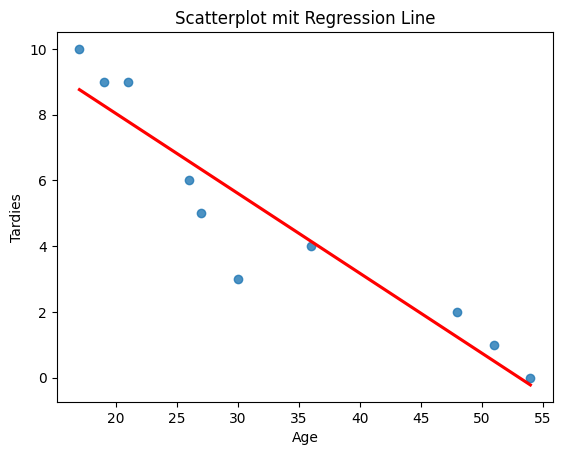

In [12]:
# Regression Line
sns.regplot(data=student_data, x="Age", y="Tardies", ci=None, line_kws={"color": "red"})
plt.title("Scatterplot mit Regression Line")
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

# *your explanation here*
The regression line seems pretty accurate and the model fits the data well. The older the students, the less late they are.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.

In [13]:
from google.colab import files
uploaded = files.upload()

Saving vehicles.csv to vehicles.csv


In [18]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable.

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [22]:
# Your code here.

# Covariance
covariance = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]].cov()

# Correlation
correlation = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]].corr()

print("Covariance")
print(covariance)

Covariance
                               Year   Cylinders  Fuel Barrels/Year  \
Year                     101.713065    1.459896          -9.960687   
Cylinders                  1.459896    3.080967           5.798763   
Fuel Barrels/Year         -9.960687    5.798763          19.956615   
Combined MPG              10.556963   -6.269421         -20.777227   
Fuel Cost/Year          -469.934524  692.437947        2074.962381   
CO2 Emission Grams/Mile -266.928999  157.237699         524.532182   

                         Combined MPG  Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                        10.556963     -469.934524              -266.928999  
Cylinders                   -6.269421      692.437947               157.237699  
Fuel Barrels/Year          -20.777227     2074.962381               524.532182  
Combined MPG                26.136725    -2268.286203              -563.783910  
Fuel Cost/Year           -2268.286203   257007.049913             56185.983710  
CO2 Emission

In [21]:
print("Correlation")
print(correlation)

Correlation
                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [25]:
# Your code here.
x=vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y=vehicles[["CO2 Emission Grams/Mile"]]

lm = LinearRegression()

model = lm.fit(x,y)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
# Your code here.
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Interpretation:
    # Intercept (769.89):
      # This is the estimated CO2 emission (in grams per mile) when all predictor variables are zero (which is usually theoretical and unlikely in reality).
    # Year (-0.32):
      # Each additional year (i.e., newer vehicles) is associated with a decrease of about 0.32 grams of CO2 per mile, holding all other factors constant. This suggests newer cars tend to be more environmentally friendly.
    # Cylinders (1.88):
      # Each additional cylinder in the engine increases CO2 emissions by approximately 1.88 grams per mile, assuming other variables stay the same. More cylinders generally mean more emissions.
    # Fuel Barrels/Year (19.05):
      # Each additional barrel of fuel consumed per year is associated with an increase of about 19.05 grams of CO2 per mile. This has the strongest positive effect.
    # Combined MPG (-3.04):
      # Higher fuel efficiency (miles per gallon) decreases CO2 emissions by about 3.04 grams per mile for every 1 MPG increase, all else equal.
    # Fuel Cost/Year (0.03):
      # Increasing annual fuel cost by one unit (dollar or other currency) is associated with a slight increase of 0.03 grams CO2 per mile, which is a very small effect.


Intercept: [769.88828365]
Coefficients: [[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]]


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression.
First, build a dataframe with the data.

In [27]:
# Your code here.
party_data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

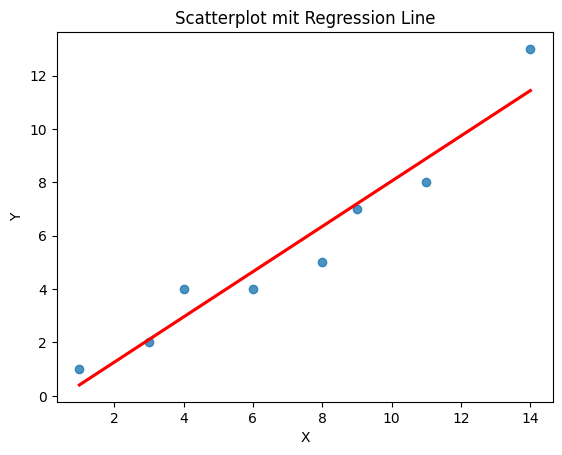

In [30]:
# Your code here.
sns.regplot(data=party_data, x="X", y="Y", ci=None, line_kws={"color": "red"})
plt.title("Scatterplot mit Regression Line")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*The scatterplat with the regression lines points towards a linear regression: The more people invited, the more people are unable to attend.*


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model.

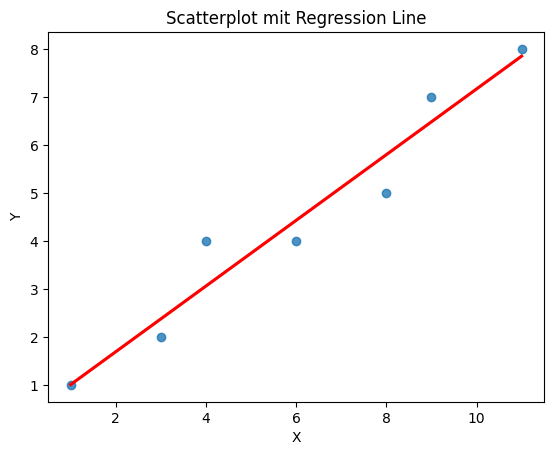

In [32]:
party_data_outlier_removed = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})
sns.regplot(data=party_data_outlier_removed, x="X", y="Y", ci=None, line_kws={"color": "red"})
plt.title("Scatterplot mit Regression Line")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*The slope of the regression line for 'people invited' increased, indicating that the variable has a stronger estimated effect on the outcome variable y than before."*